In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [29]:
le=LabelEncoder()
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])
df["ShelveLoc"].unique()

array([0, 1, 2])

In [30]:
le=LabelEncoder()
df["Urban"]=le.fit_transform(df["Urban"])
df["Urban"].unique()

array([1, 0])

In [31]:
le=LabelEncoder()
df["US"]=le.fit_transform(df["US"])
df["US"].unique()

array([1, 0])

In [32]:
df["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [33]:
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array=df.values
X=array[:,2:]
Y=array[:,1]
num_trees=200
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees,max_depth=5,min_samples_leaf=5,max_features='sqrt')
results=cross_val_score(model,X,Y,cv=kfold)
print(results)

[0.075  0.0375 0.025  0.     0.0375]


In [34]:
X,Y

(array([[ 73.,  11., 276., ...,  17.,   1.,   1.],
        [ 48.,  16., 260., ...,  10.,   1.,   1.],
        [ 35.,  10., 269., ...,  12.,   1.,   1.],
        ...,
        [ 26.,  12., 368., ...,  18.,   1.,   1.],
        [ 79.,   7., 284., ...,  12.,   1.,   1.],
        [ 37.,   0.,  27., ...,  16.,   1.,   1.]]),
 array([138., 111., 113., 117., 141., 124., 115., 136., 132., 132., 121.,
        117., 122., 115., 107., 149., 118., 147., 110., 129., 125., 134.,
        128., 121., 145., 139., 107.,  98., 103., 104., 125., 136., 107.,
        114., 115., 131., 122., 121., 109., 130., 119., 157.,  77., 123.,
         85., 141., 127., 126., 116., 157.,  99., 121., 153., 109., 134.,
        143., 133.,  93., 103., 118., 122., 105., 139., 119., 100., 122.,
        127., 126., 149., 127.,  89., 148., 115., 118., 150.,  88., 102.,
        118., 134., 134., 113., 116., 151., 109., 111., 125., 150., 131.,
        117., 128., 115.,  97., 114., 145., 115., 134., 147., 161., 122.,
        121.,

In [35]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=25,n_jobs=-1)
params={
    'max_depth':[2,3,5,'None'],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,250]
}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=2,scoring="accuracy")
grid_search.fit(X,Y)


Fitting 4 folds for each of 48 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
 

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=2)

In [36]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 50}
0.05499999999999999


In [37]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=25)

In [38]:
model.fit(X,Y)
model.feature_importances_

array([0.17507331, 0.08964255, 0.18280752, 0.20912584, 0.04039497,
       0.1517932 , 0.09817491, 0.03244736, 0.02054034])

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [40]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
model=AdaBoostClassifier(n_estimators=5,random_state=5)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())


0.017499999999999998


In [41]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
estimators=[]
model1=LogisticRegression(max_iter=20)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('decision_tree',model2))
model3=SVC()
estimators.append(('svm',model3))


In [43]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results_voting = cross_val_score(ensemble, X, Y, cv=kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [44]:
results_voting

array([0.   , 0.025, 0.075, 0.   , 0.   , 0.   , 0.   , 0.05 , 0.025,
       0.05 ])

In [45]:
results_voting.mean()

0.022500000000000003

In [46]:
stack = StackingClassifier(estimators)
results_stacking = cross_val_score(stack, X, Y, cv=kfold)
print(results_stacking.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
results_stacking

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
df['Sales'].describe()


count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

<ipython-input-49-6591cacea3d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})


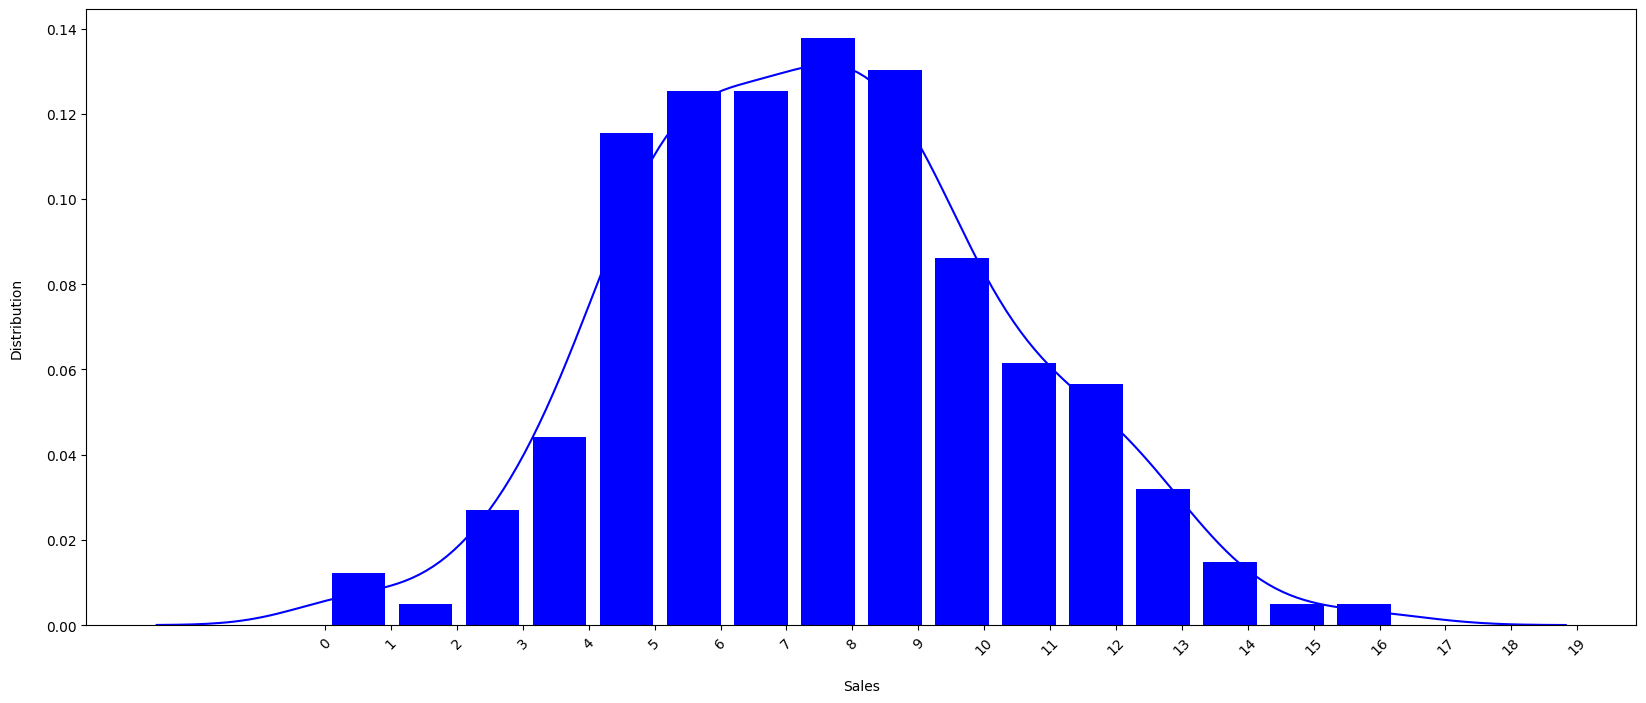

In [49]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")